In [1]:
from NJA import *
import skimage.io as io
from skimage.color import rgb2gray
from copy import deepcopy
import matplotlib.pyplot as plt
from rich import print
import numpy as np
import networkx as nx
# %matplotlib widget

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
testimage = io.imread("test/testbrokenweb.png")[:,:,:3]
testimage = (rgb2gray(testimage) > 0)
net = NJANet(testimage)

In [4]:
net.skeletonize().find_nodes().find_directions()

 Finding Dirs: 100%|████████████████████████████████████████████████████| 49/49 [00:00<00:00, 203083.89it/s]


In [5]:
print(net)

NJANet
Nodes: 49
Edges: 0

In [6]:
net.trace_paths(try_predict=True, jump=0.1, lookback=0.1, max_thresh=20)

Tracing Paths: 100%|███████████████████████████████████████████████████████| 49/49 [00:00<00:00, 121.94it/s]


In [7]:
net.clean_edges()

Cleaning Edgelist: 100%|█████████████████████████████████████████████| 134/134 [00:00<00:00, 1117369.26it/s]


In [8]:
print(net)

NJANet
Nodes: 49
Edges: 67

In [9]:
net.cluster_close_nodes(10)

Cleaning Edgelist: 100%|████████████████████████████████████████████████| 19/19 [00:00<00:00, 268322.48it/s]


In [10]:
net._check_integrity()

Checking Edge Dict UIDs: 100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 355766.86it/s]

No Errors Found!
Nodes: 20
Edges: 19
Node Dict Errors: 0
Edge Dict Errors: 0



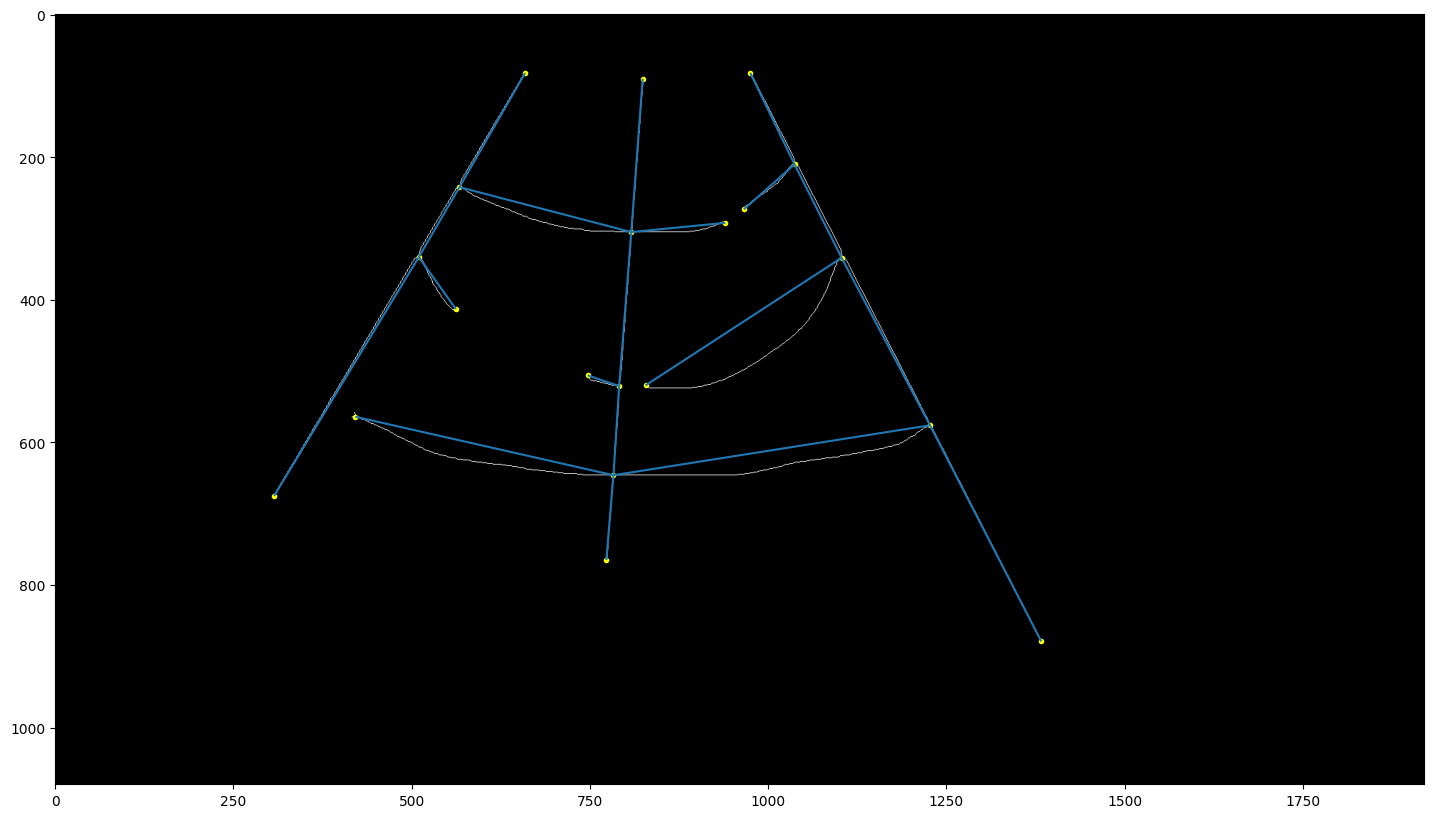

In [11]:
net.plot()

In [12]:
# for x in net.find_incorrect_1nodes().values():
#     print(x)
#     print(len(x.connected_edges))

In [13]:
net.resolve_incorrect_1nodes()

Cleaning Edgelist: 100%|████████████████████████████████████████████████| 19/19 [00:00<00:00, 223853.30it/s]


In [14]:
net._check_integrity()

Checking Edge Dict UIDs: 100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 367243.21it/s]

No Errors Found!
Nodes: 20
Edges: 19
Node Dict Errors: 0
Edge Dict Errors: 0



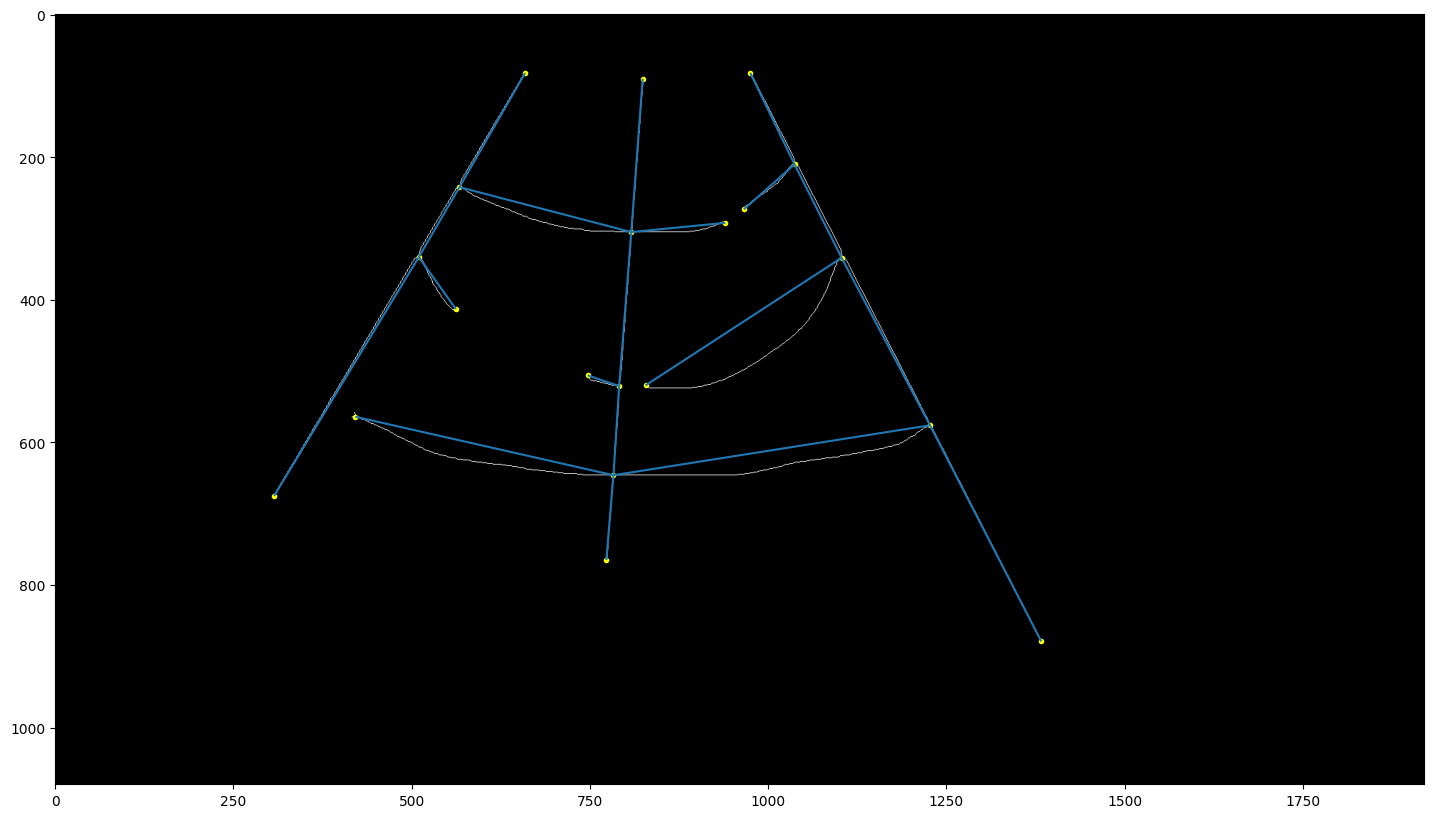

In [15]:
net.plot()

In [16]:
net.nodes[(82, 659)]

NJANode([ 82 659], (82, 659), [[False False False]
 [False False False]
 [ True False False]], 1, ['SW'])

In [17]:
net.nodes[(82, 659)].to_networkx_format()

((82, 659),
 {'position': array([ 82, 659]),
  'surround': array([[False, False, False],
         [False, False, False],
         [ True, False, False]]),
  'juncs': 1,
  'dirs': ['SW']})

In [18]:
net.edges[(82, 659, 242, 567)].to_networkx_format()

((82, 659),
 (242, 567),
 {'pixel_length': 198.10764773832497, 'direct_length': 184.56435192094924})

In [19]:
netdict = net.to_networkx_format(listformat=True, weighted=True)

In [20]:
g = nx.Graph()

In [21]:
g.add_nodes_from(netdict[0])

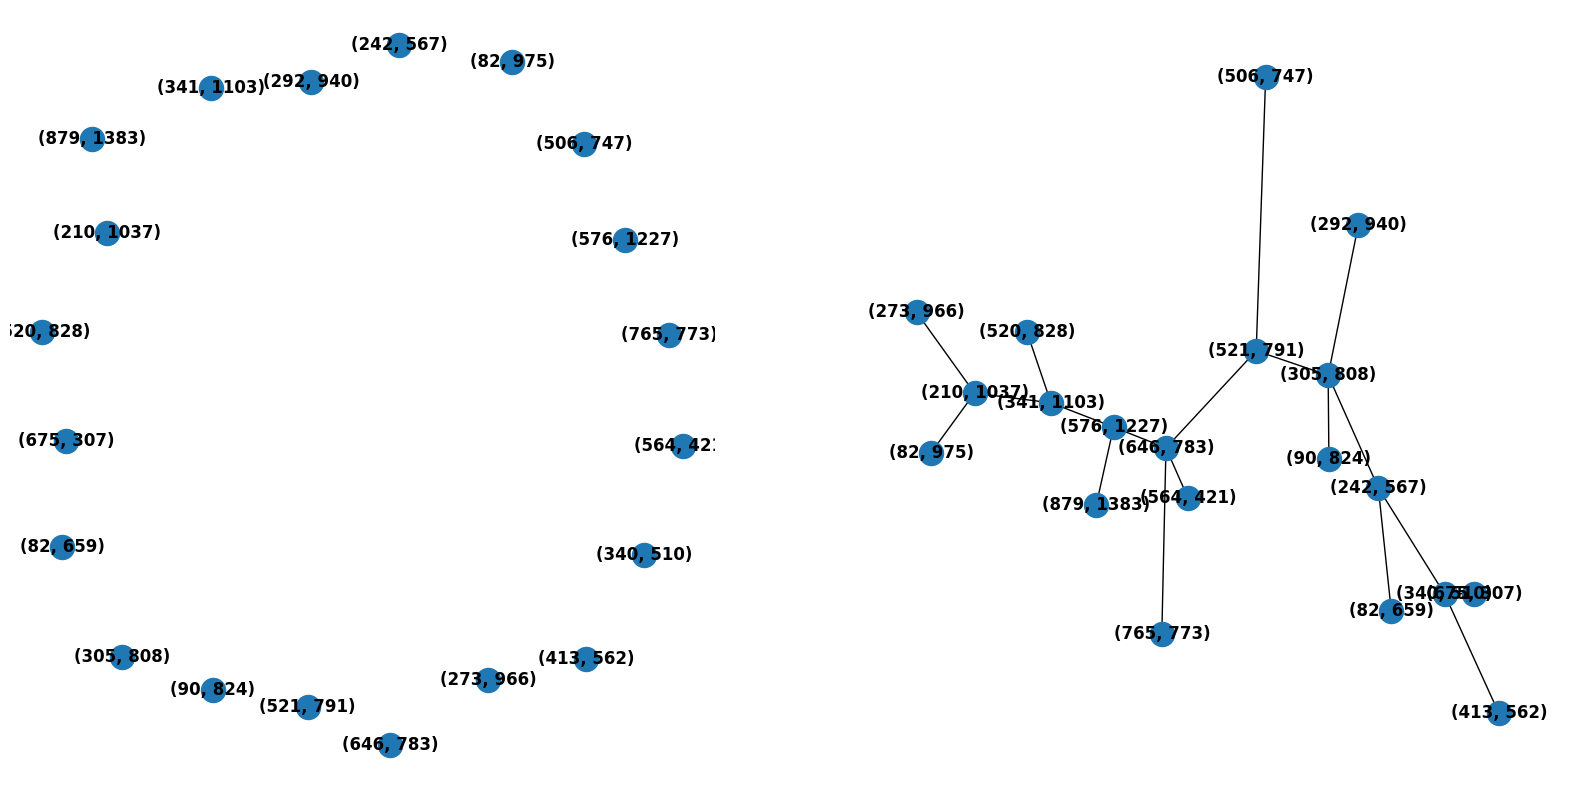

In [22]:
subax1 = plt.subplot(121)
nx.draw(g, with_labels=True, font_weight='bold')
g.add_edges_from(netdict[1])
subax2 = plt.subplot(122)
nx.draw(g, with_labels=True, font_weight='bold')

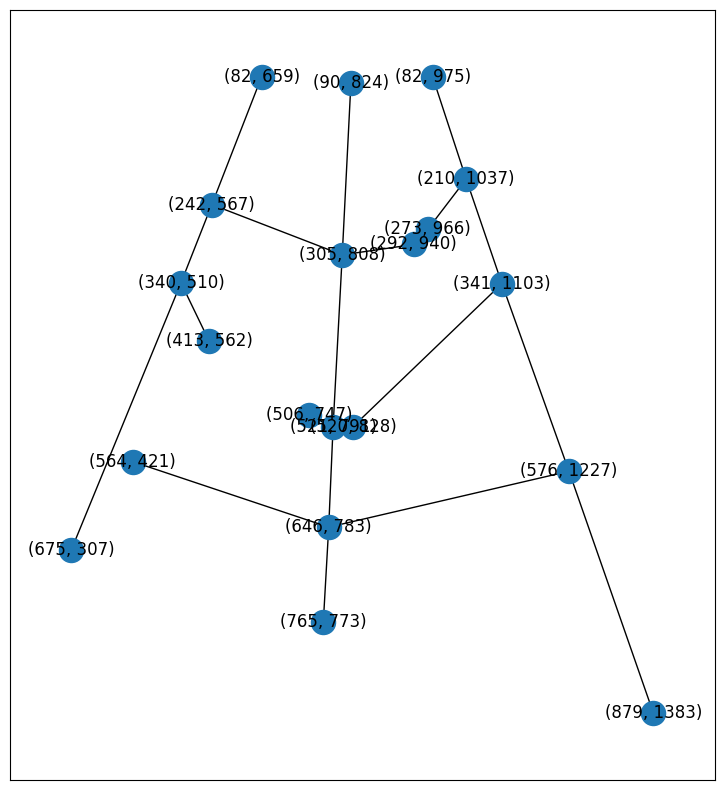

In [23]:
subax3 = plt.subplot(121)
plt.gca().invert_yaxis()
nx.draw_networkx(g, net.networkx_node_positions(), with_labels=True)

In [24]:
nx.to_dict_of_dicts(g)

{(82,
  659): {(242, 567): {'pixel_length': 198.10764773832497,
   'direct_length': 184.56435192094924,
   'weight': 198.10764773832497}},
 (82,
  975): {(210, 1037): {'pixel_length': 152.68124086713186,
   'direct_length': 141.32586458253138,
   'weight': 152.68124086713186}},
 (90,
  824): {(305, 808): {'pixel_length': 220.6274169979696,
   'direct_length': 214.59729728027799,
   'weight': 220.6274169979696}},
 (210,
  1037): {(82, 975): {'pixel_length': 152.68124086713186,
   'direct_length': 141.32586458253138,
   'weight': 152.68124086713186}, (273,
   966): {'pixel_length': 101.95331880577395, 'direct_length': 94.17536832951598, 'weight': 101.95331880577395}, (341,
   1103): {'pixel_length': 157.50966799187808,
   'direct_length': 145.34441853748632,
   'weight': 157.50966799187808}},
 (242,
  567): {(82, 659): {'pixel_length': 198.10764773832497,
   'direct_length': 184.56435192094924,
   'weight': 198.10764773832497}, (340,
   510): {'pixel_length': 122.36753236814702, 'direct_

In [25]:
nx.all_pairs_node_connectivity(g)

{(82, 659): {(82, 975): 1,
  (90, 824): 1,
  (210, 1037): 1,
  (242, 567): 1,
  (273, 966): 1,
  (292, 940): 1,
  (305, 808): 1,
  (340, 510): 1,
  (341, 1103): 1,
  (413, 562): 1,
  (506, 747): 1,
  (520, 828): 1,
  (521, 791): 1,
  (564, 421): 1,
  (576, 1227): 1,
  (646, 783): 1,
  (675, 307): 1,
  (765, 773): 1,
  (879, 1383): 1},
 (82, 975): {(82, 659): 1,
  (90, 824): 1,
  (210, 1037): 1,
  (242, 567): 1,
  (273, 966): 1,
  (292, 940): 1,
  (305, 808): 1,
  (340, 510): 1,
  (341, 1103): 1,
  (413, 562): 1,
  (506, 747): 1,
  (520, 828): 1,
  (521, 791): 1,
  (564, 421): 1,
  (576, 1227): 1,
  (646, 783): 1,
  (675, 307): 1,
  (765, 773): 1,
  (879, 1383): 1},
 (90, 824): {(82, 659): 1,
  (82, 975): 1,
  (210, 1037): 1,
  (242, 567): 1,
  (273, 966): 1,
  (292, 940): 1,
  (305, 808): 1,
  (340, 510): 1,
  (341, 1103): 1,
  (413, 562): 1,
  (506, 747): 1,
  (520, 828): 1,
  (521, 791): 1,
  (564, 421): 1,
  (576, 1227): 1,
  (646, 783): 1,
  (675, 307): 1,
  (765, 773): 1,
  (879, 